# ***Python-Based Fuel Efficiency Prediction Using TensorFlow***



### Benefits of this Project

1. **Improved Vehicle Performance Insights:**
   - **Objective:** The project aims to predict fuel efficiency (miles per gallon or MPG) of vehicles based on various attributes.
   - **Benefit:** Understanding how different features (e.g., horsepower, cylinders) affect fuel efficiency can help vehicle manufacturers design more efficient engines and improve vehicle performance. It also aids consumers in making informed decisions about vehicle purchases based on fuel economy.

2. **Data-Driven Decision Making:**
   - **Objective:** Utilizes machine learning techniques to analyze historical data and make predictions about future fuel efficiency.
   - **Benefit:** Provides a data-driven approach to decision-making. Instead of relying on theoretical or empirical guesses, stakeholders can use the model's predictions to make more accurate assessments and decisions.

3. **Enhanced Model Accuracy and Reliability:**
   - **Objective:** Employs TensorFlow and neural networks to build a predictive model.
   - **Benefit:** Neural networks can capture complex, non-linear relationships between features, potentially leading to more accurate predictions compared to simpler models. TensorFlow's support for high-performance computing and its sophisticated data pipeline tools also contribute to model reliability and efficiency.

4. **Visualization and Analysis Tools:**
   - **Objective:** Includes data visualization techniques such as bar charts and heatmaps to analyze feature relationships and correlations.
   - **Benefit:** Helps in understanding the dataset and feature relationships better. Visualization makes it easier to identify patterns, correlations, and anomalies, which are crucial for model improvement and feature selection.

5. **Efficient Data Handling and Processing:**
   - **Objective:** Uses TensorFlow’s data pipeline for efficient data processing and batching.
   - **Benefit:** Efficient data handling reduces training time and resource consumption. TensorFlow’s `tf.data.Dataset` API allows for handling large datasets in a memory-efficient manner, optimizing the training process.

6. **Model Evaluation and Performance Tracking:**
   - **Objective:** Tracks and visualizes model performance using metrics like Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE).
   - **Benefit:** Provides insights into the model’s accuracy and performance over time. Tracking these metrics helps in understanding how well the model is generalizing to new data and in identifying potential areas for improvement.

7. **Practical Applications:**
   - **Objective:** Predicts fuel efficiency based on vehicle characteristics.
   - **Benefit:** Practical applications include aiding automotive engineers in optimizing fuel efficiency, assisting consumers in selecting fuel-efficient vehicles, and supporting policy-makers in making data-informed decisions about environmental regulations and incentives.

8. **Foundation for Further Research and Development:**
   - **Objective:** Establishes a base model and framework for predicting fuel efficiency.
   - **Benefit:** Serves as a foundation for further research and development. Future work can involve incorporating additional features, experimenting with advanced machine learning techniques, or expanding the model to other types of predictions related to vehicle performance.

### Summary
The project provides valuable insights into vehicle fuel efficiency by leveraging advanced machine learning techniques. It benefits various stakeholders by offering accurate predictions, improving decision-making, and facilitating further research. The use of visualization and efficient data processing ensures that the model is both robust and practical, making it a useful tool for the automotive industry and consumers alike.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output


In [40]:
# Load the dataset
df = pd.read_csv('auto-mpg.csv') # Read the dataset from a CSV file
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [60]:
# Basic information about the dataset
df.shape

(398, 6)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [43]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,398.000000,398.000000,398.000000,396.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.189394,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.402030,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [61]:
# Handle non-numeric 'horsepower' values
df['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193,   0, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82])

In [45]:
print(df.shape)
df = df[df['horsepower'] != '?']
print(df.shape)

(398, 7)
(398, 7)


In [46]:
# Fill NaNs with 0
df['horsepower'] = df['horsepower'].fillna(0).astype(int)
# Check for missing values
df.isnull().sum()


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model-year,0


In [47]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,94
weight,351
acceleration,95
model-year,13


Column 'origin' not found in DataFrame


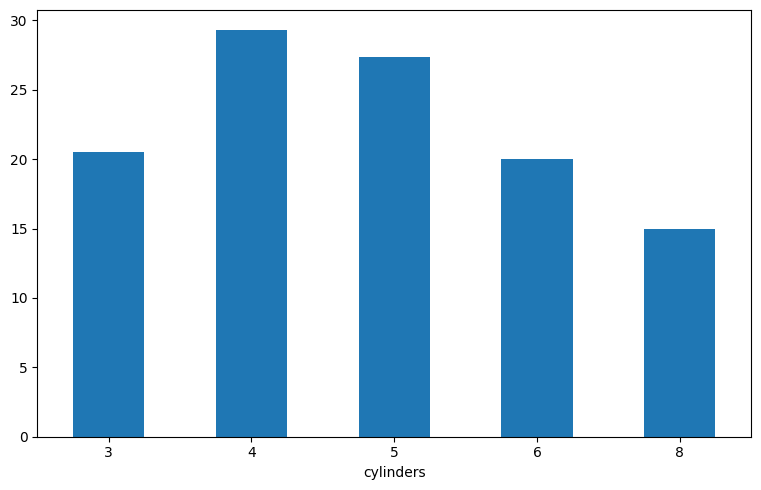

In [48]:
# Visualization
plt.subplots(figsize=(15, 5))
# Iterate over the columns to create bar plots
for i, col in enumerate(['cylinders', 'origin']):
    if col in df.columns:
        plt.subplot(1, 2, i+1)
        x = df.groupby(col).mean()['mpg']
        x.plot.bar()
        plt.xticks(rotation=0)
    else:
        print(f"Column '{col}' not found in DataFrame")

plt.tight_layout()
plt.show()


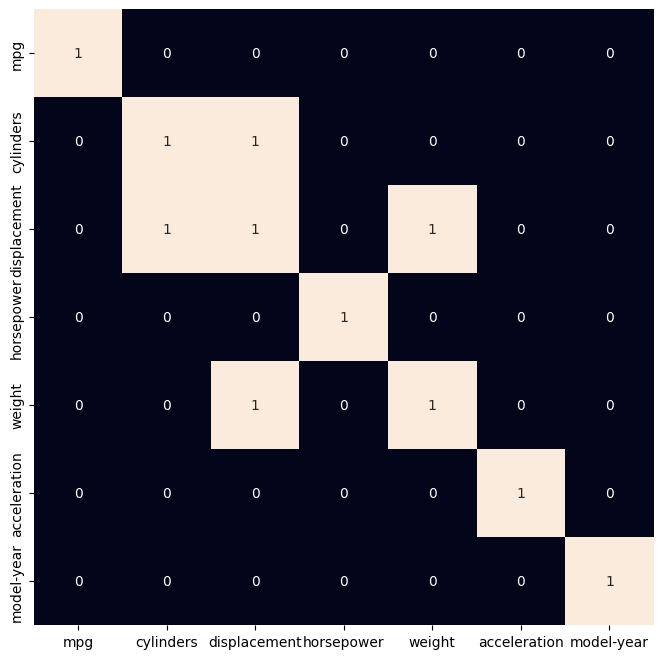

In [49]:
# Correlation heatmap
plt.figure(figsize=(8, 8)) # Create a figure with size 8x8 inches
sb.heatmap(df.corr() > 0.9,
		annot=True,
		cbar=False) # Plot a heatmap of the correlation matrix with a threshold of 0.9

plt.show() # Display the heatmap

In [50]:
# Drop the 'displacement' column
df.drop('displacement',
		axis=1,
		inplace=True) # Remove the 'displacement' column from the DataFrame


In [75]:
# Split the data into features and target
from sklearn.model_selection import train_test_split
# Use the correct column names
features = df.drop(['mpg', 'car name'], axis=1, errors='ignore')
target = df['mpg'].values # Set the target variable as 'mpg' values
# Train-test split
X_train, X_val, Y_train, Y_val = train_test_split(
    features, target, test_size=0.2, random_state=22
) # Split data into training and validation sets (80% train, 20% validation)

print(X_train.shape, X_val.shape) # Print the shape of training and validation sets



(318, 6) (80, 6)


In [76]:
# TensorFlow data pipeline
AUTO = tf.data.experimental.AUTOTUNE # Auto-tune for optimal performance


train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train)) # Convert training data to TensorFlow dataset
    .batch(32) # Batch the data into batches of 32 samples
    .prefetch(AUTO) # Prefetch batches for improved performance
)

val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val)) # Convert validation data to TensorFlow dataset
    .batch(32) # Batch the data into batches of 32 samples
    .prefetch(AUTO)  # Prefetch batches for improved performance
)


In [84]:
# Define the model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]), # Input layer with 256 neurons and ReLU activation
    layers.BatchNormalization(), # Batch normalization layer
    layers.Dense(256, activation='relu'), # Hidden layer with 256 neurons and ReLU activation
    layers.Dropout(0.3), # Dropout layer with 30% dropout rate
    layers.BatchNormalization(),  # Batch normalization layer
    layers.Dense(1, activation='relu') # Output layer with 1 neuron and ReLU activation (suitable for regression)

])

In [78]:
# Compile the model
model.compile(
    loss='mae', # Mean Absolute Error as the loss function
    optimizer='adam', # Adam optimizer
    metrics=['mape'] # Mean Absolute Percentage Error as a metric
)
model.summary() # Print a summary of the model architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,889 (273.00 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [79]:
# Train the model
history = model.fit(
    train_ds,
    epochs=50, # Number of epochs for training
    validation_data=val_ds # Validation data for evaluating the model during training
)



Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 22.2759 - mape: 90.5396 - val_loss: nan - val_mape: nan
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.1265 - mape: 77.7259 - val_loss: nan - val_mape: nan
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.3717 - mape: 73.7555 - val_loss: nan - val_mape: nan
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.6842 - mape: 70.0285 - val_loss: nan - val_mape: nan
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.2775 - mape: 68.0418 - val_loss: nan - val_mape: nan
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.9617 - mape: 66.4444 - val_loss: nan - val_mape: nan
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.4839 - mape: 64.2912 - val_loss: nan - val_mape: nan
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.9921 - mape: 62.0055 - val_loss: nan - val_mape: nan
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.5674 - mape: 60.3001 - v

In [80]:
# Convert training history to DataFrame
history_df = pd.DataFrame(history.history) # Convert training history to DataFrame for analysis
history_df.head() # Print the first few rows of the training history DataFrame


,loss,mape,val_loss,val_mape
0,21.108227,85.113747,NaN,NaN
1,19.509769,75.809135,NaN,NaN
2,18.694981,71.416214,NaN,NaN
3,18.036263,68.008904,NaN,NaN
4,17.581202,65.826881,NaN,NaN


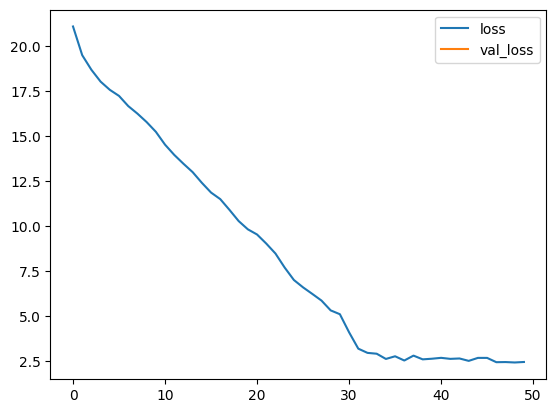

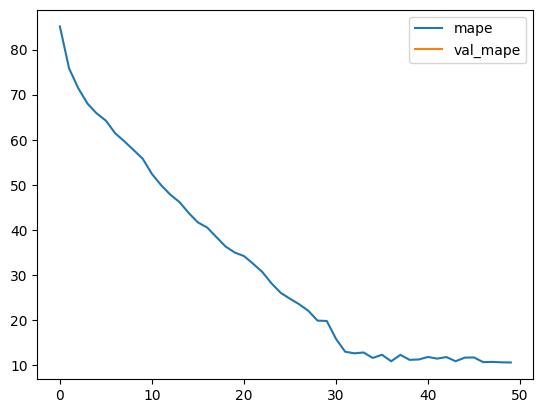

In [81]:

# Plot the loss and metric history
history_df.loc[:, ['loss', 'val_loss']].plot()  # Plot training and validation loss
history_df.loc[:, ['mape', 'val_mape']].plot() # Plot training and validation MAPE
plt.show()
